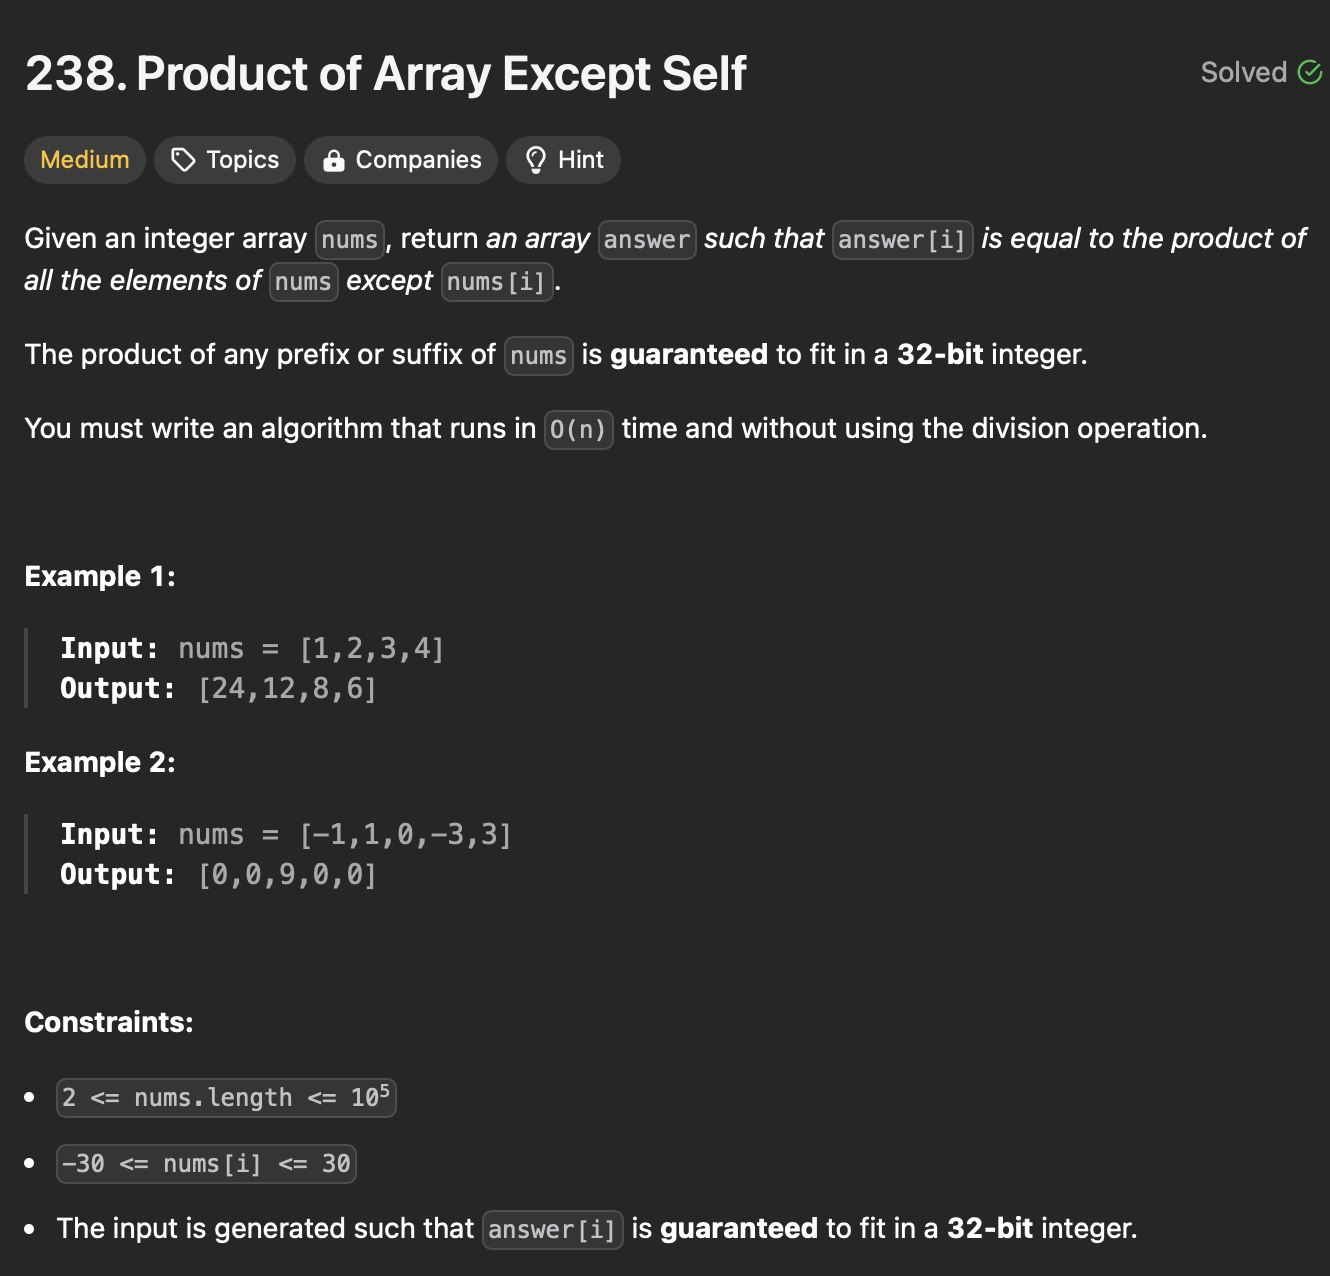

# Product of Array Except Self Using Two Auxiliary Arrays

This algorithm computes the product of all elements except the current one by building two auxiliary arrays: one for left products and one for right products. Note that this solution is not performed in-place, so it is not the most space-optimal solution.

## How It Works
1. **Left Array Construction**:  
   For each index `i`, the left array stores the product of all elements to the left of `i`.  
   *Example*: For `nums = [1, 2, 3, 4]`, the left array becomes `[1, 1, 2, 6]`.

2. **Right Array Construction**:  
   For each index `i`, the right array stores the product of all elements to the right of `i`.  
   *Example*: For `nums = [1, 2, 3, 4]`, the right array becomes `[24, 12, 4, 1]`.

3. **Result Formation**:  
   The final product for each index is obtained by multiplying the corresponding values from the left and right arrays.  
   *Example*: The result is `[1×24, 1×12, 2×4, 6×1] = [24, 12, 8, 6]`.

## Corner Cases
- **Empty Array**: Returns an empty array.
- **Single Element**: Returns an array with a single element (typically `[1]` as there are no other numbers).
- **Zeros in the Array**: The multiplication will naturally account for zeros based on their positions.

## Complexity
- **Time Complexity**: O(n) — The algorithm makes three passes over the array (left products, right products, and final result).
- **Space Complexity**: O(n) — Extra space is used for the left, right, and result arrays.

In [1]:
from typing import List

class Solution:
    def productExceptSelf(self, nums: List[int]) -> List[int]:
        n = len(nums)
        
        left = [1] * n
        right = [1] * n

        for i in range(1, n):
            left[i] = left[i - 1] * nums[i - 1]

       
        for i in range(n - 2, -1, -1):
            right[i] = right[i + 1] * nums[i + 1]

      
        result = [0] * n
        for i in range(n):
            result[i] = left[i] * right[i]

        return result




<center>

# Much More Optimized Solution

# Product of Array Except Self With Division

This algorithm computes the product of all elements except the current one using division, while handling zeros explicitly.

## How It Works
1. **Initialization**:  
   - Traverse the array to calculate the product of non-zero elements and count zeros.
2. **Zero Handling**:  
   - If more than one zero exists, return an array of zeros.
   - If exactly one zero exists, set the position of the zero to the product of non-zero elements and all other positions to zero.
3. **Division Approach**:  
   - If no zeros are found, replace each element with the total product divided by that element.

## Corner Cases
- **Multiple Zeros**: Returns an array of zeros.
- **Single Zero**: Only the zero index gets the product of non-zero elements, while others become zero.
- **No Zeros**: Standard division is applied for each element.

## Complexity
- **Time Complexity**: O(n) — the array is traversed twice.
- **Space Complexity**: O(1) — operations are done in-place.


In [2]:
class Solution:
    def productExceptSelf(self, nums):
        prod=1
        n=len(nums)
        count0=0

        for i in nums:
            if i==0:
                count0+=1
                if count0>1:
                    return [0]*n
            else:
                prod*=i

        if count0==1:
            for i in range(len(nums)):
                if nums[i]==0:
                    nums[i]=prod
                else:
                    nums[i]=0
            return nums
                
        for i in range(len(nums)):
            nums[i]=prod//nums[i]
        return nums    

In [3]:
sol=Solution()
test_case=[[1,2,3,4],[-1,1,0,-3,3],[-1,0,0,-3,3]]    
for i in range(len(test_case)):
    print(i+1,sol.productExceptSelf(test_case[i]))     

1 [24, 12, 8, 6]
2 [0, 0, 9, 0, 0]
3 [0, 0, 0, 0, 0]
